In [19]:
import sys
import os
import gc

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/2025_data"))
sys.path.append('/eos/home-d/dcostasr/SWAN_projects/software/hipy')

from wcte.brbtools import sort_run_files, get_part_files, select_good_parts
from wcte.mapping  import id_names

import numpy             as np
import hipy.pltext       as pltext
import matplotlib.pyplot as plt
import pandas            as pd
import hipy.utils        as ut
import hipy.cfit         as cfit
import hipy.efit         as efit
import hipy.histos       as histos

from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

pltext.style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
run = 1570

In [22]:
df_mpmt = pd.read_parquet(f"/eos/home-d/dcostasr/SWAN_projects/2025_data/data/{run}/df_mPMTs.parquet")
df_beam = pd.read_parquet(f"/eos/home-d/dcostasr/SWAN_projects/2025_data/data/{run}/df_beam.parquet")

In [23]:
df_mpmt

,evt,card1_charge,card1_time,card1_nHits,card3_charge,card3_time,card3_nHits,card6_charge,card6_time,card6_nHits,...,card130_nHits,card131_charge,card131_time,card131_nHits,card132_charge,card132_time,card132_nHits,event_total_charge,event_total_mean_time,event_total_nHits
evt,,,,,,,,,,,,,,,,,,,,,
0,0,1464.0,858.184521,5.0,2161.0,1818.529395,10.0,1514.0,1117.421570,8.0,...,9,11945.0,2451.971301,10,6983.0,2268.960229,5.0,98042.0,1408.761509,341.0
1,1,6819.0,1761.646671,19.0,6643.0,1961.598728,18.0,15018.0,1546.041562,19.0,...,14,10585.0,2361.956067,10,8323.0,2267.379858,5.0,896081.0,1848.913290,1418.0
2,2,2770.0,854.065796,10.0,2864.0,1815.122382,9.0,2469.0,1113.392478,11.0,...,11,17297.0,2337.436081,8,9455.0,2266.088110,5.0,101960.0,1393.686985,325.0
3,3,1886.0,854.539272,7.0,2556.0,1815.224554,11.0,3015.0,1345.950731,13.0,...,14,10536.0,2334.921265,8,6156.0,2266.759204,5.0,70894.0,1450.108967,257.0
4,4,6029.0,1122.139130,16.0,10835.0,1690.767171,18.0,14759.0,1268.144226,22.0,...,16,17116.0,2085.290710,12,11151.0,2582.719543,6.0,631961.0,1391.215548,1023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304681,304681,19249.0,1017.145508,21.0,10933.0,1811.676848,19.0,28579.0,1544.867082,22.0,...,14,11030.0,2403.025330,10,5433.0,2263.563208,5.0,1280843.0,1728.712635,1405.0
304682,304682,426.0,857.552979,3.0,NaN,NaN,NaN,1086.0,1116.109294,3.0,...,9,12067.0,2315.443935,7,5297.0,2268.604395,5.0,22007.0,1504.169169,103.0
304683,304683,1970.0,1196.080225,10.0,5255.0,1813.909640,13.0,6105.0,1195.694435,16.0,...,8,14298.0,2397.439587,10,6354.0,2264.761646,5.0,153615.0,1940.876482,519.0


In [24]:
df_beam

,evt,evt_number,window_time,part_number,ACT0-L_nhits,ACT0-L_charge,ACT0-L_time,ACT0-R_nhits,ACT0-R_charge,ACT0-R_time,...,T1-T0_time,ACT0_charge,ACT1_charge,ACT2_charge,ACT3_charge,ACT4_charge,ACT5_charge,ACT_g1_charge,ACT_g2_charge,TOF_nhits
0,0,0,1.036208e+10,0,0,0.0,0.0,0,0.0,0.000000,...,298.629440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1,1,1.036749e+10,0,0,0.0,0.0,1,206.0,2251.807129,...,-38.220286,206.0,922.0,2210.0,0.0,0.0,0.0,3338.0,0.0,2
2,2,2,1.036753e+10,0,0,0.0,0.0,0,0.0,0.000000,...,109.698985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,3,3,1.037534e+10,0,0,0.0,0.0,0,0.0,0.000000,...,377.896045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,4,4,1.037922e+10,0,0,0.0,0.0,1,481.0,1938.694092,...,297.902776,481.0,1298.0,521.0,0.0,0.0,0.0,2300.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304681,304681,1075,3.495300e+12,117,0,0.0,0.0,1,2227.0,2238.574707,...,-43.878098,2227.0,1371.0,2083.0,0.0,0.0,0.0,5681.0,0.0,2
304682,304682,1076,3.495300e+12,117,0,0.0,0.0,0,0.0,0.000000,...,193.442688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
304683,304683,1077,3.495300e+12,117,0,0.0,0.0,0,0.0,0.000000,...,-34.826604,0.0,90.0,0.0,0.0,0.0,0.0,90.0,0.0,2
304684,304684,1078,3.495300e+12,117,0,0.0,0.0,1,2807.0,4616.031006,...,21.748632,2807.0,2746.0,2371.0,0.0,0.0,0.0,7924.0,0.0,4


In [26]:
df_mpmt = df_mpmt.reset_index(drop=True)
df_beam = df_beam.reset_index(drop=True)

df_merged = pd.merge(df_mpmt, df_beam, on="evt", how="right")
del df_mpmt
gc.collect()
del df_beam
gc.collect()

0

In [27]:
df_merged

,evt,card1_charge,card1_time,card1_nHits,card3_charge,card3_time,card3_nHits,card6_charge,card6_time,card6_nHits,...,T1-T0_time,ACT0_charge,ACT1_charge,ACT2_charge,ACT3_charge,ACT4_charge,ACT5_charge,ACT_g1_charge,ACT_g2_charge,TOF_nhits
0,0,1464.0,858.184521,5.0,2161.0,1818.529395,10.0,1514.0,1117.421570,8.0,...,298.629440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1,6819.0,1761.646671,19.0,6643.0,1961.598728,18.0,15018.0,1546.041562,19.0,...,-38.220286,206.0,922.0,2210.0,0.0,0.0,0.0,3338.0,0.0,2
2,2,2770.0,854.065796,10.0,2864.0,1815.122382,9.0,2469.0,1113.392478,11.0,...,109.698985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,3,1886.0,854.539272,7.0,2556.0,1815.224554,11.0,3015.0,1345.950731,13.0,...,377.896045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,4,6029.0,1122.139130,16.0,10835.0,1690.767171,18.0,14759.0,1268.144226,22.0,...,297.902776,481.0,1298.0,521.0,0.0,0.0,0.0,2300.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300744,304681,19249.0,1017.145508,21.0,10933.0,1811.676848,19.0,28579.0,1544.867082,22.0,...,-43.878098,2227.0,1371.0,2083.0,0.0,0.0,0.0,5681.0,0.0,2
300745,304682,426.0,857.552979,3.0,NaN,NaN,NaN,1086.0,1116.109294,3.0,...,193.442688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
300746,304683,1970.0,1196.080225,10.0,5255.0,1813.909640,13.0,6105.0,1195.694435,16.0,...,-34.826604,0.0,90.0,0.0,0.0,0.0,0.0,90.0,0.0,2
300747,304684,20848.0,2696.416374,30.0,27095.0,3623.229355,25.0,49047.0,2932.095020,27.0,...,21.748632,2807.0,2746.0,2371.0,0.0,0.0,0.0,7924.0,0.0,4


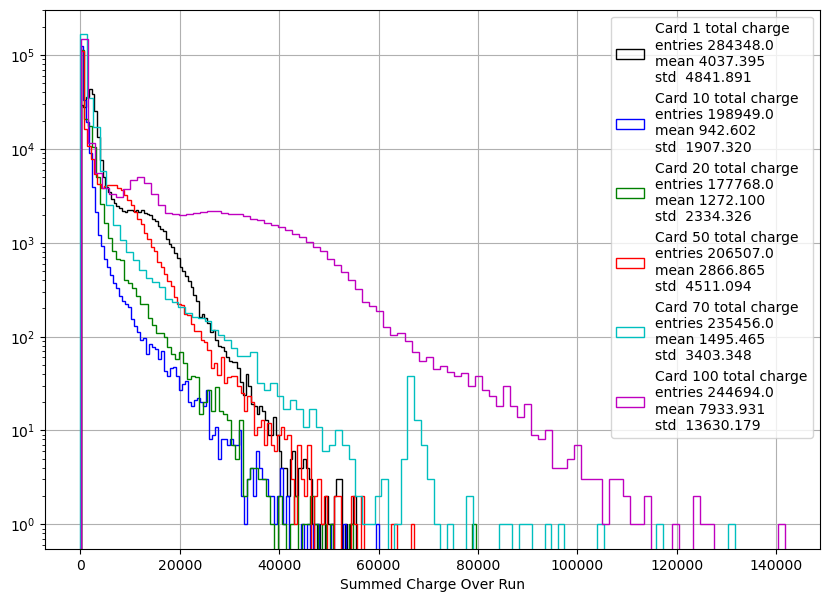

In [28]:
fig = plt.figure(figsize=(10, 7))

pltext.hist(df_merged["card1_charge"].dropna(), 100, ylog=True,  xylabels=("Summed Charge Over Run"), label="Card 1 total charge");
pltext.hist(df_merged["card10_charge"].dropna(), 100, ylog=True , label="Card 10 total charge");
pltext.hist(df_merged["card20_charge"].dropna(), 100, ylog=True , label="Card 20 total charge");
pltext.hist(df_merged["card40_charge"].dropna(), 100, ylog=True , label="Card 50 total charge");
pltext.hist(df_merged["card80_charge"].dropna(), 100, ylog=True , label="Card 70 total charge");
pltext.hist(df_merged["card100_charge"].dropna(), 100, ylog=True, label="Card 100 total charge");

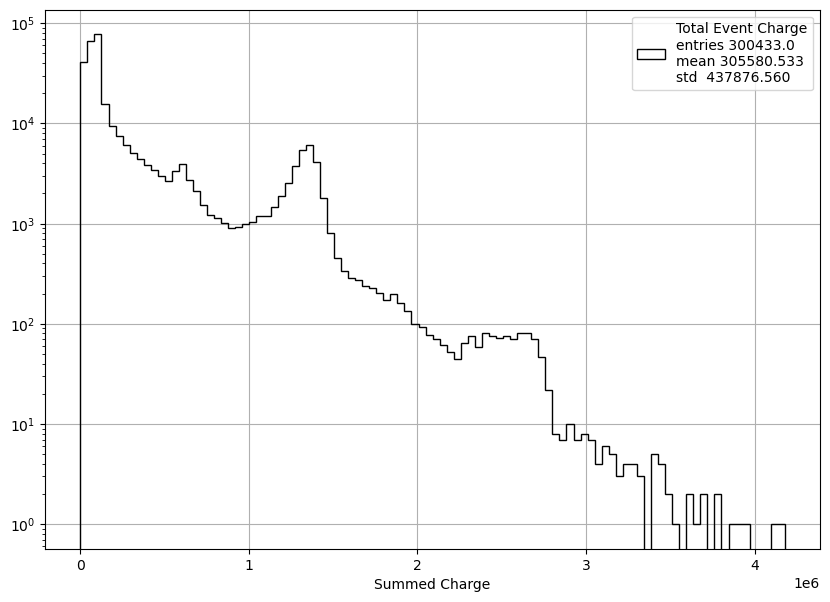

In [29]:
fig = plt.figure(figsize=(10, 7))
pltext.hist(df_merged["event_total_charge"].dropna(), 100, ylog=True,  xylabels=("Summed Charge"), label="Total Event Charge");

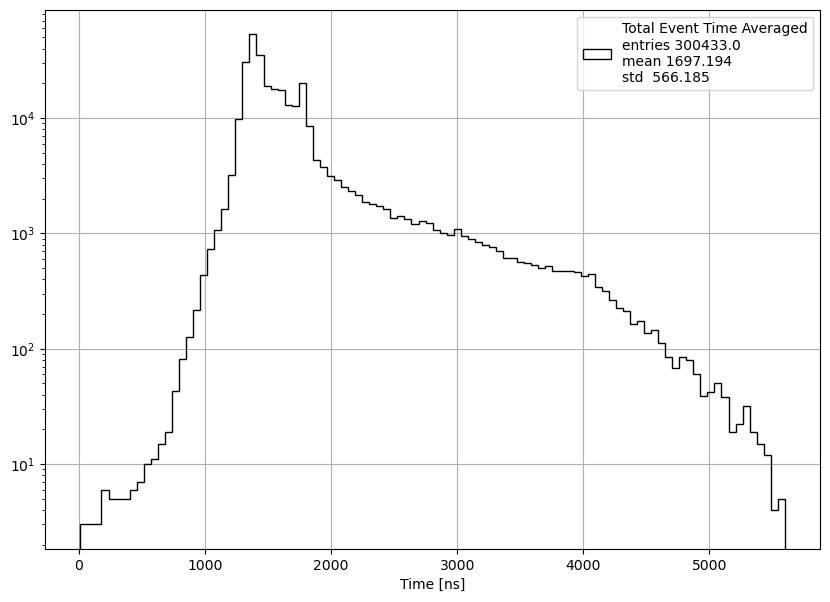

In [30]:
fig = plt.figure(figsize=(10, 7))
pltext.hist(df_merged["event_total_mean_time"].dropna(), 100, ylog=True,  xylabels=("Time [ns]"), label="Total Event Time Averaged");